In [1]:
import networkx as nx
from fair_cc_functions import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [50]:
def greedy_puzzle(red_g, blue_g):
    # 2) perform cc-pivot on each subgraph, clusters sorted
    blue_cluster = sorted(cc_pivot(blue_g), key=len)
    red_cluster = sorted(cc_pivot(red_g), key=len)

    # 3) get size of clustering
    min_c = np.min([len(blue_cluster), len(red_cluster)])
    max_c = np.max([len(blue_cluster), len(red_cluster)])
    if len(red_cluster) > len(blue_cluster):
        big = red_cluster
        small = blue_cluster
    else:
        big = blue_cluster
        small = red_cluster

    # 4) greedy algo and sort the largest clusters together
    final_cluster=[]
    remain_small = []
    remain_big = []
    for i in range(0, min_c):
        if len(big[i]) == len(small[i]):
            final_cluster.append(big[i] + small[i])
            continue
        # cut at smaller cluster
        if len(big[i]) < len(small[i]):
            if remain_big:
                fill = []
                while remain_big:
                    el = remain_big[0]
                    fill.extend(el)
                    remain_big.remove(el)
                    if len(fill)+len(big[i]) == len(small[i]):
                        final_cluster.append(big[i]+fill + small[i])
            else:
                final_cluster.append(big[i]+small[i][:len(big[i])])
                remain_small.append(small[i][len(big[i]):])
            continue
        if len(big[i]) > len(small[i]):
            if remain_small:
                fill = []
                while remain_small:
                    el = remain_small[0]
                    fill.extend(el)
                    remain_small.remove(el)
                    if len(fill) + len(small[i]) == len(big[i]):
                        final_cluster.append(big[i]+fill +small[i])
            else:
                final_cluster.append(big[i][:len(small[i])]+small[i])
                remain_big.append(big[i][len(small[i]):])
            continue
    # sort into remaining clusters
    for i in range(min_c, max_c):
        fill = []
        while remain_small:
            el = remain_small[0]
            fill.extend(el)
            remain_small.remove(el)
            if len(fill) == len(big[i]):
                final_cluster.append(big[i]+fill)
                break
    return final_cluster, red_cluster, blue_cluster

In [58]:
def stats_puzzle(n, red_type, blue_type, iters=10):
    # 1) generate 2 subgraphs (one red, one blue)
    cluster_bal = []
    red_cost, blue_cost = [], []
    cluster_cost = []
    for i in range(10, n, 2):
        _, red_g, blue_g = generate_red_blue_graph(i, red_type, blue_type)
        red_g.add_edges_from(red_g.edges, weight=1)
        red_g.add_edges_from(nx.complement(red_g).edges, weight=0)
        blue_g.add_edges_from(blue_g.edges, weight=1)
        blue_g.add_edges_from(nx.complement(blue_g).edges, weight=0)
        composed_graph = nx.compose(red_g, blue_g)
        c, cost_b, cost_r = [], [], []
        for j in range(iters):
            fin_c, r_cl, b_cl = greedy_puzzle(red_g, blue_g)
            c.append(cost(fin_c, composed_graph))
            cost_b.append(cost(b_cl, blue_g))
            cost_r.append(cost(r_cl, red_g))
        cluster_cost.append(c)
        red_cost.append(cost_r)
        blue_cost.append(cost_b)
    return fin_c, cluster_cost, red_cost, blue_cost

In [ ]:
it = 100
tree_tree_puzzle = stats_puzzle(61, 'bal_bin_tree', 'bal_bin_tree', iters=it)
tree_star_puzzle = stats_puzzle(61, 'bal_bin_tree', 'star', it)
tree_cyc_puzzle = stats_puzzle(61, 'bal_bin_tree', 'circle', it)
tree_bipar_puzzle = stats_puzzle(61, 'bal_bin_tree', 'bipartite', it)
tree_3par_puzzle = stats_puzzle(61, 'bal_bin_tree', '3partite', it)

In [ ]:
star_star_puzzle = stats_puzzle(61, 'star', 'star', iters=it)
star_cyc_puzzle = stats_puzzle(61, 'star', 'circle', it)
star_3par_puzzle = stats_puzzle(61, 'star', '3partite', it)
star_bipar_puzzle = stats_puzzle(61, 'star', 'bipartite', it)

In [ ]:
cyc_cyc_puzzle = stats_puzzle(61, 'circle', 'circle', iters=it)
cyc_bipar_puzzle = stats_puzzle(61, 'circle', 'bipartite', it)
cyc_3par_puzzle = stats_puzzle(61, 'circle', 'bipartite', it)

In [ ]:
bipar_bipar_puzzle = stats_puzzle(61, 'bipartite', 'bipartite', it)
bipar_3par_puzzle = stats_puzzle(61, 'bipartite', '3partite', it)
threepar_3par_puzzle = stats_puzzle(61, 'bipartite', '3partite', it)

<class 'numpy.float64'>
<class 'numpy.float64'>


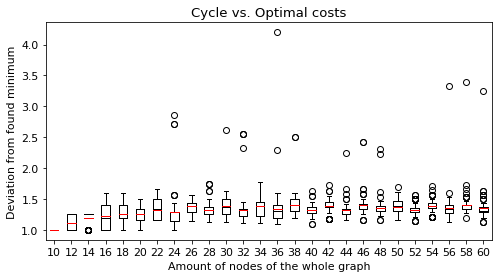

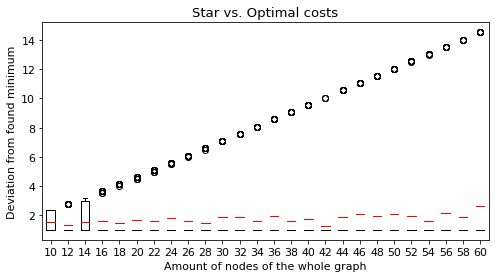

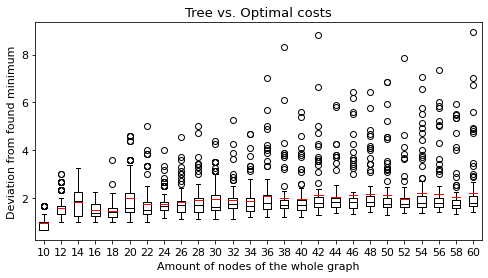

In [77]:
plt.rc('font', size=11)
def boxplot_vs_opt(to_plot, opt,
                     title='Title',
                     ylabel ='Deviation from found minimum',
                     xlabel='Amount of nodes of the whole graph',
                     name='boxplot.png'):
    fig1, ax1 = plt.subplots(1, 1, figsize=(8,4))
    # scale data so that 0 corresponds to optimal cost and 1 to 3 times optimal costs (equation)
    ax1.boxplot([i/j for i,j in zip(to_plot, opt)], showmeans=True, meanline=True, medianprops={'color':'black'}, meanprops={'color':'red', 'linestyle':'-'})
    ax1.set_title(title)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([i for i in range(1,27)], nodes)
    plt.savefig('IncompleteGraphsPlots/{}.png'.format(name))
    plt.show()

opt_star = [np.float64(i-4) for i in range(10,61,2)]
opt_cyc = [2*(np.floor((j/2)/2)+1) for j in range(10,61,2)]
opt_tree = [2*(np.floor((j/2)/2)+ (j/2) % 2) for j in range (10, 61, 2)]

print(type(opt_star[0]))
print(type(opt_cyc[0]))
boxplot_vs_opt(cyc_cyc_puzzle[1], opt_cyc, 'Cycle vs. Optimal costs', name='cyc_puzzle_opt')
boxplot_vs_opt(star_star_puzzle[1], opt_star, 'Star vs. Optimal costs', name='star_puzzle_opt')
boxplot_vs_opt(tree_tree_puzzle[1], opt_tree, 'Tree vs. Optimal costs', name='tree_puzzle_opt')